In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [14]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [4]:
type(X_train)

pandas.core.frame.DataFrame

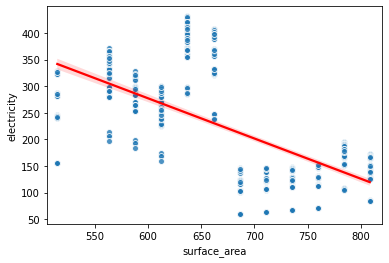

In [5]:
sns.regplot(x=X_train, y=y_train, data = Elec,
            line_kws={'color':'red'}, scatter_kws={'edgecolor':'white'})
plt.xlim(505, 820)
plt.show()

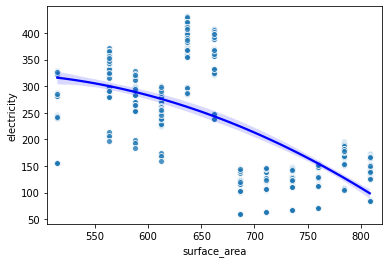

In [6]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws={'color':'blue'}, scatter_kws={'edgecolor':'white'},
            order = 2)
plt.xlim(505, 820)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


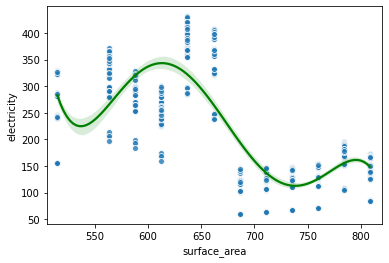

In [7]:
sns.regplot(X_train, y_train, data=Elec, 
            line_kws={'color':'green'}, scatter_kws={'edgecolor':'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


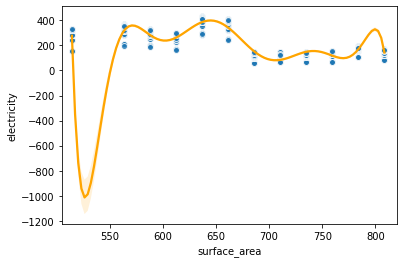

In [8]:
sns.regplot(Elec['surface_area'], Elec['electricity'], 
            line_kws={'color':'orange'}, scatter_kws={'edgecolor':'white'},
            order = 9)
plt.xlim(505, 820)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], Elec[['electricity']],
                                                   test_size=0.3, random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 1) (537, 1)
(231, 1) (231, 1)


In [30]:
type(X_train)

pandas.core.frame.DataFrame

In [29]:
type(Elec['surface_area'])

pandas.core.series.Series

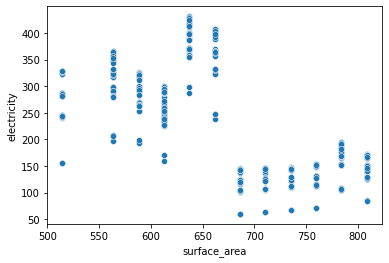

In [28]:
sns.scatterplot(x=X_train['surface_area'], y=y_train['electricity'])
plt.show()

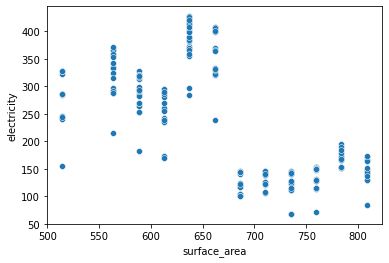

In [31]:
sns.scatterplot(x=X_test['surface_area'], y=y_test['electricity'])
plt.show()

In [32]:
# 1차 모델링
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

y_hat = Model_1.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE_1 = mean_squared_error(y_test, y_hat)
MSE_1

6223.358707562413

In [35]:
# 2차 모델링
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree = 2, include_bias=False)
PX2 = poly.fit_transform(X_train)

Model_2 = LinearRegression()
Model_2.fit(PX2, y_train)

MSE_2 = mean_squared_error(y_test, Model_2.predict(poly.fit_transform(X_test)))
MSE_2

6001.481829153072

In [36]:
# 5차 모델링
poly = PolynomialFeatures(degree = 5, include_bias=False)
PX5 = poly.fit_transform(X_train)

Model_5 = LinearRegression()
Model_5.fit(PX5, y_train)

MSE_5 = mean_squared_error(y_test, Model_5.predict(poly.fit_transform(X_test)))
MSE_5

4315.5834321189

In [38]:
# 9차 모델링
poly = PolynomialFeatures(degree = 9, include_bias=False)
PX9 = poly.fit_transform(X_train)

Model_9 = LinearRegression()
Model_9.fit(PX9, y_train)

MSE_9 = mean_squared_error(y_test, Model_9.predict(poly.fit_transform(X_test)))
MSE_9

4221.018850082486

vd

In [39]:
X, X_test, y, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'],
                                        test_size=int(len(Elec)*0.2), random_state=2045 )
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [40]:
X_train, X_vd, y_train, y_vd = train_test_split(X, y, test_size= int(len(Elec)*0.2), random_state=2045)
print(X_train.shape, y_train.shape)
print(X_vd.shape, y_vd.shape)

(462, 1) (462,)
(153, 1) (153,)


In [41]:
# 5차 모델
poly = PolynomialFeatures(degree=5, include_bias=False)
PX5= poly.fit_transform(X_train)
ModelVD_5 = LinearRegression()
ModelVD_5.fit(PX5, y_train)

MSEVD_5 = mean_squared_error(y_vd, ModelVD_5.predict(poly.fit_transform(X_vd)))
MSEVD_5

4136.4312593408395

In [43]:
# 9차 모델
poly = PolynomialFeatures(degree=9, include_bias=False)
PX9 = poly.fit_transform(X_train)

ModelVD_9 = LinearRegression()
ModelVD_9.fit(PX9, y_train)

MSEVD_9 = mean_squared_error(y_vd, ModelVD_9.predict(poly.fit_transform(X_vd)))
MSEVD_9

3955.9733124909912

In [47]:
PX9_test = poly.fit_transform(X_test)

y_hat = ModelVD_9.predict(PX9_test)
MSE = mean_squared_error(y_test, y_hat)
MSE

4220.88573210769